# Entrega 4: Visualización de datos con Python

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygal as pg

### Load Data

In [2]:
df = pd.read_csv('covid19-provincias-spain_consolidated.csv')
df.head()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,hospitalized_accumulated,...,daily_deaths_avg7,daily_deaths_avg7_hosp_eus,deaths_last_week,num_casos_avg7,num_casos_prueba_pcr_avg7,num_casos2_avg7,ia14,source_name,source,comments
0,2020-01-01,Albacete,2,Castilla - La Mancha,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,Alicante/Alacant,3,Comunitat Valenciana,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,Araba/Álava,1,País Vasco,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,Asturias,33,"Asturias, Principado de",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing Data

Comprobamos si el conjunto de datos presenta valores desconocidos

In [3]:
df.isna().sum()

date                                0
province                            0
ine_code                            0
ccaa                                0
new_cases                       29105
PCR                             35988
TestAc                          46887
activos                         42865
hospitalized                    12430
hospitalized_accumulated        45024
hospitalized_new                45100
intensive_care                  12208
deceased                         8630
cases_accumulated               23423
cases_accumulated_PCR           24345
recovered                       47754
deceased_hosp_eus               47990
num_casos                       28243
num_casos_prueba_pcr            28243
num_casos_prueba_test_ac        28243
num_casos_prueba_ag             28243
num_casos_prueba_elisa          28243
num_casos_prueba_desconocida    28243
num_casos_cum1                  28243
num_casos2                       6091
num_hosp                         6091
num_uci     

Como podemos observar, el conjunto de datos presenta miles de valores desconocidos.
Por ello, procedemos a eliminar las columnas que consideremos innecesarias.

In [4]:
df_opt = df[['date', 'province', 'ccaa', 'num_casos', 'num_def', 'poblacion']]
df_opt

,date,province,ccaa,num_casos,num_def,poblacion
0,2020-01-01,Albacete,Castilla - La Mancha,0.0,0.0,388167
1,2020-01-01,Alicante/Alacant,Comunitat Valenciana,1.0,0.0,1858683
2,2020-01-01,Almería,Andalucía,0.0,0.0,716820
3,2020-01-01,Araba/Álava,País Vasco,0.0,0.0,331549
4,2020-01-01,Asturias,"Asturias, Principado de",0.0,0.0,1022800
...,...,...,...,...,...,...
48570,2022-09-20,Zaragoza,Aragón,NaN,NaN,964693
48571,2022-09-21,"Coruña, A",Galicia,NaN,NaN,1119596
48572,2022-09-21,Lugo,Galicia,NaN,NaN,329587
48573,2022-09-21,Ourense,Galicia,NaN,NaN,307651


Tal y como se indica, debemos eliminar los datos que no sean validos en el numero de casos (num_casos)

In [5]:
df_opt = df_opt.dropna()
df_opt

,date,province,ccaa,num_casos,num_def,poblacion
0,2020-01-01,Albacete,Castilla - La Mancha,0.0,0.0,388167
1,2020-01-01,Alicante/Alacant,Comunitat Valenciana,1.0,0.0,1858683
2,2020-01-01,Almería,Andalucía,0.0,0.0,716820
3,2020-01-01,Araba/Álava,País Vasco,0.0,0.0,331549
4,2020-01-01,Asturias,"Asturias, Principado de",0.0,0.0,1022800
...,...,...,...,...,...,...
20327,2021-01-25,Toledo,Castilla - La Mancha,0.0,11.0,694844
20328,2021-01-25,Valencia/València,Comunitat Valenciana,85.0,53.0,2565124
20329,2021-01-25,Valladolid,Castilla y León,0.0,3.0,519546
20330,2021-01-25,Zamora,Castilla y León,0.0,1.0,172539


## Graphs

### Grafico #1: Gráfico que muestre la distribucion que sigue una variable

C:\Users\Jhon\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


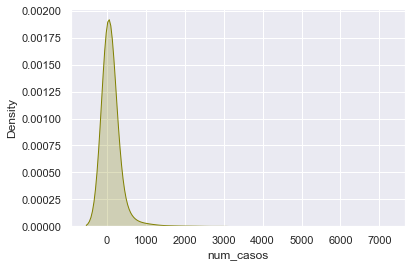

In [6]:
sns.set(style="darkgrid")
sns.kdeplot(df_opt['num_casos'], shade=True, bw=0.5, color="olive")
plt.show()

### Grafico #2: Gráfico que muestre la evolución total

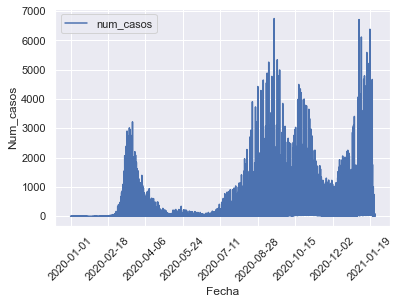

In [7]:
df_opt.plot(x='date', y='num_casos', kind='line')
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.ylabel("Num_casos")
plt.show()

### Grafico #3: Gráfico que muestre la evolución por comunidades autónomas

In [8]:
# Obtenemos la lista con las comunidades autonomas para poder representar un grafico por cada una de ellas
comunidades = df_opt['ccaa'].unique()
comunidades

array(['Castilla - La Mancha', 'Comunitat Valenciana', 'Andalucía',
       'País Vasco', 'Asturias, Principado de', 'Castilla y León',
       'Extremadura', 'Balears, Illes', 'Cataluña', 'Cantabria', 'Ceuta',
       'Galicia', 'Aragón', 'Madrid, Comunidad de', 'Melilla',
       'Murcia, Región de', 'Navarra, Comunidad Foral de', 'Canarias',
       'Rioja, La'], dtype=object)

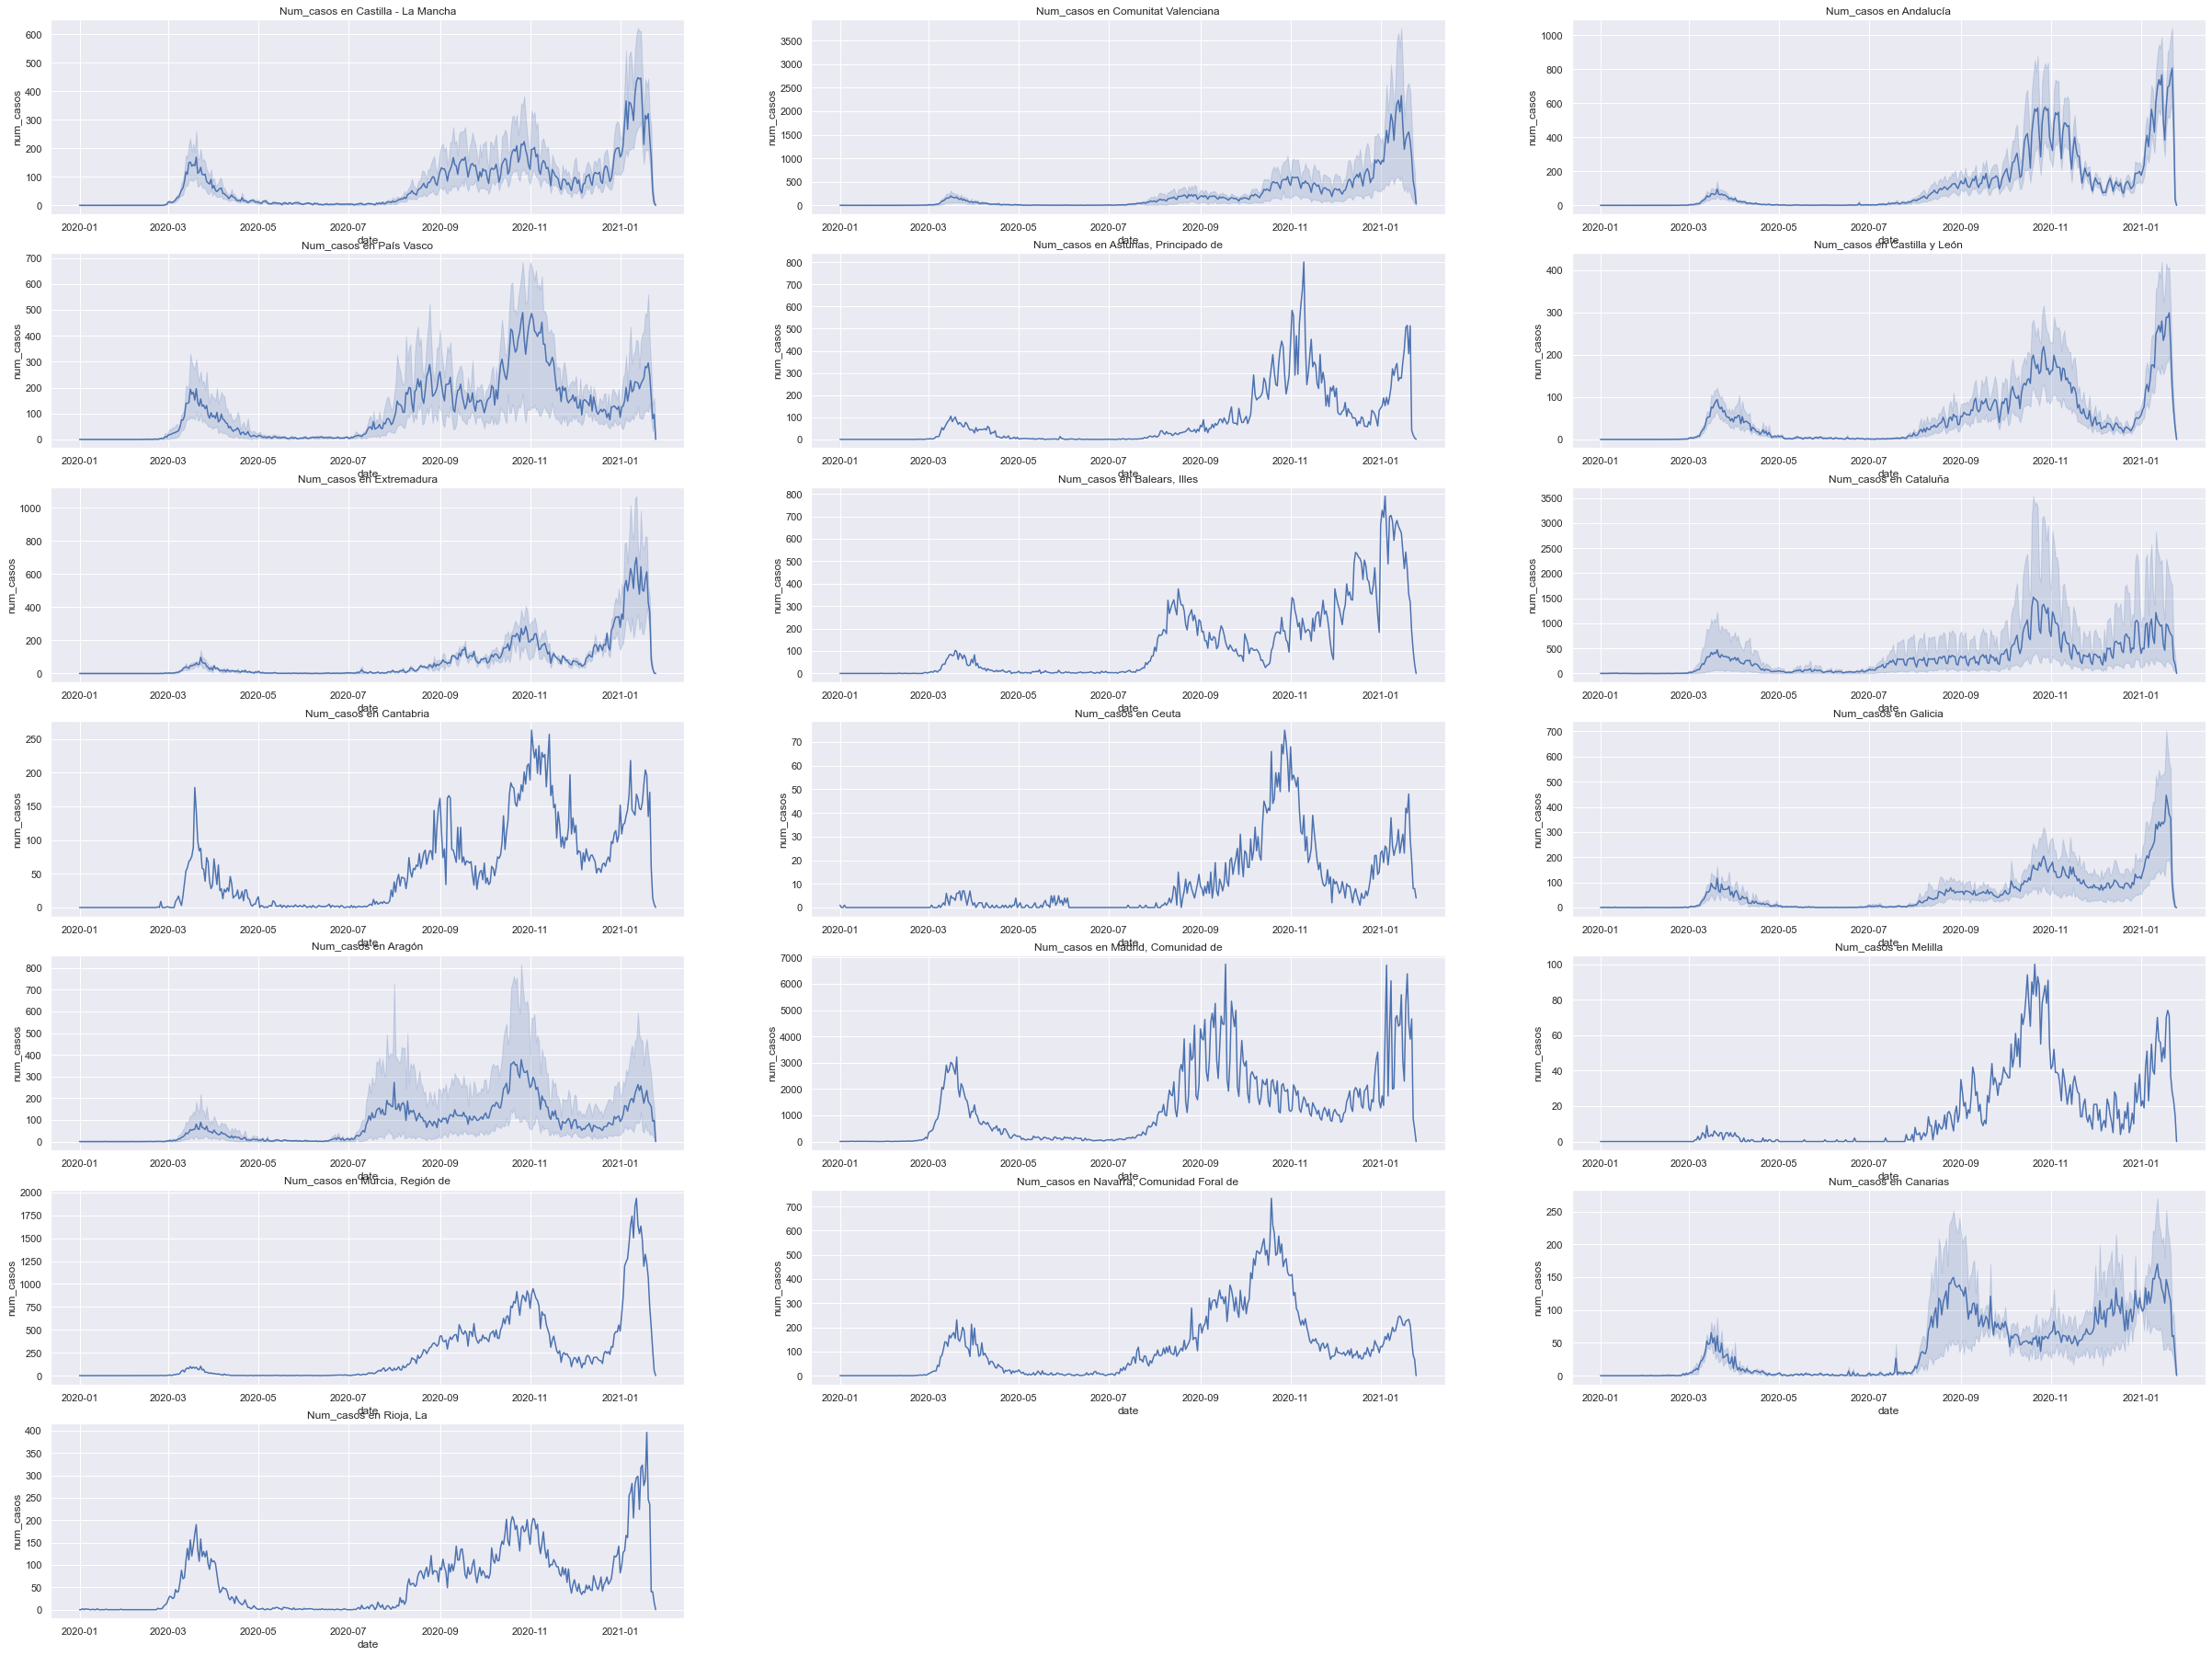

In [9]:
plt.figure(figsize=(42,32))
i=1
for ca in comunidades:
    plt.subplot(7,3,i) #pos grafico
    sns.lineplot(x=pd.to_datetime(df_opt.date), y=df_opt[df_opt.ccaa==ca].num_casos)
    plt.title('Num_casos en ' + ca)
    i += 1
    
plt.show()

### Grafico #4: Gráfico que muestre los casos por provincias

In [10]:
# Agrupamos el numero de casos por provincias y contamos el numero de casos
df_opt_group_by = df_opt.groupby('province', as_index=False)["num_casos"].sum()
df_opt_group_by

,province,num_casos
0,Albacete,22129.0
1,Alicante/Alacant,95133.0
2,Almería,32810.0
3,Araba/Álava,19204.0
4,Asturias,33781.0
5,Badajoz,39881.0
6,"Balears, Illes",49611.0
7,Barcelona,346896.0
8,Bizkaia,64523.0
9,Burgos,26136.0


In [11]:
# Ordenamos la tabla en y nos quedamos con los 5 primeros, es decir, las 5 provincias con mas casos
df_opt_group_by_ordered = df_opt_group_by.sort_values(by=['num_casos'], ascending=False)
top_5 = df_opt_group_by_ordered.head(5)
top_5

,province,num_casos
29,Madrid,493480.0
7,Barcelona,346896.0
47,Valencia/València,147592.0
1,Alicante/Alacant,95133.0
31,Murcia,90861.0


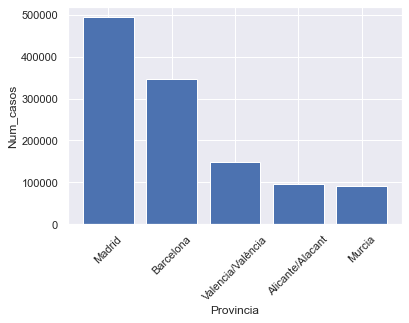

In [12]:
plt.figure()
plt.bar(top_5['province'], top_5['num_casos'])
plt.xlabel("Provincia")
plt.xticks(rotation=45)
plt.ylabel("Num_casos")
plt.show()

### Grafico #5: Gráfico que muestre un diagrama de dispersión entre dos variables

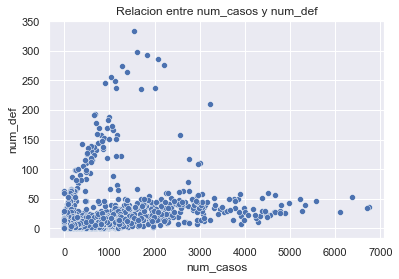

In [13]:
plt.figure()
sns.scatterplot(x=df_opt['num_casos'], y=df_opt['num_def'])
plt.title('Relacion entre num_casos y num_def')
plt.xlabel('num_casos')
plt.ylabel('num_def')
plt.show()

### Grafico #6: Gráfico de tarta que muestre el total por sexos

In [14]:
# Agrupamos el numero de casos por ccaa y contamos el numero de casos
df_opt_group_by_ccaa = df_opt.groupby('ccaa', as_index=False)["num_casos"].sum()
df_opt_group_by_ccaa

,ccaa,num_casos
0,Andalucía,363280.0
1,Aragón,92786.0
2,"Asturias, Principado de",33781.0
3,"Balears, Illes",49611.0
4,Canarias,32679.0
5,Cantabria,21694.0
6,Castilla - La Mancha,139550.0
7,Castilla y León,168314.0
8,Cataluña,467867.0
9,Ceuta,3758.0


In [15]:
df_opt_group_by_ccaa_ordered = df_opt_group_by_ccaa.sort_values(by=['num_casos'], ascending=False)
top_10 = df_opt_group_by_ccaa_ordered.head(10)
top_10

,ccaa,num_casos
13,"Madrid, Comunidad de",493480.0
8,Cataluña,467867.0
0,Andalucía,363280.0
10,Comunitat Valenciana,269802.0
7,Castilla y León,168314.0
6,Castilla - La Mancha,139550.0
17,País Vasco,128175.0
1,Aragón,92786.0
15,"Murcia, Región de",90861.0
12,Galicia,86751.0


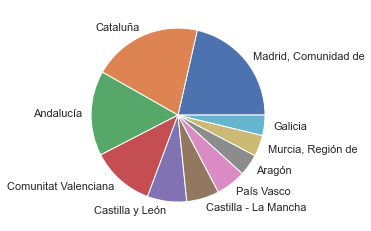

In [16]:
plt.pie(x=top_10['num_casos'],labels=top_10['ccaa'])
plt.show()

### Grafico #7: Gráfico de tipo Treemap

In [17]:
# Agrupamos el numero de casos por comunidades y provincias
df_opt_group_by_doble = df_opt.groupby(['ccaa', 'province'], as_index=False)["num_casos"].sum()
df_opt_group_by_doble

,ccaa,province,num_casos
0,Andalucía,Almería,32810.0
1,Andalucía,Cádiz,47527.0
2,Andalucía,Córdoba,35542.0
3,Andalucía,Granada,57198.0
4,Andalucía,Huelva,18292.0
5,Andalucía,Jaén,34356.0
6,Andalucía,Málaga,60913.0
7,Andalucía,Sevilla,76642.0
8,Aragón,Huesca,14862.0
9,Aragón,Teruel,10360.0


In [18]:
cc_aa = df_opt_group_by_doble['ccaa'].unique()
cc_aa

array(['Andalucía', 'Aragón', 'Asturias, Principado de', 'Balears, Illes',
       'Canarias', 'Cantabria', 'Castilla - La Mancha', 'Castilla y León',
       'Cataluña', 'Ceuta', 'Comunitat Valenciana', 'Extremadura',
       'Galicia', 'Madrid, Comunidad de', 'Melilla', 'Murcia, Región de',
       'Navarra, Comunidad Foral de', 'País Vasco', 'Rioja, La'],
      dtype=object)

In [19]:
# De esta manera consigo obtener para cada ccaa los valores de sus correspondientes provincias
df_opt_group_by_doble.loc[df_opt_group_by_doble['ccaa'] == 'Andalucía', 'num_casos']

0    32810.0
1    47527.0
2    35542.0
3    57198.0
4    18292.0
5    34356.0
6    60913.0
7    76642.0
Name: num_casos, dtype: float64

In [20]:
treemap = pg.Treemap()
treemap.title = 'TreeMap CCAA'
for i in range(len(cc_aa)):
    valores = df_opt_group_by_doble.loc[df_opt_group_by_doble['ccaa'] == cc_aa[i], 'num_casos']
    treemap.add(cc_aa[i], valores)

treemap.render_in_browser()

file://C:/Users/Jhon/AppData/Local/Temp/tmp5vic1ohp.html


### Gráficos a elección del alumno

### Grafico #8: CCAA con mayor número de defunciones (Ordenado)

In [21]:
# Agrupamos el numero de def por ccaa
df_def = df_opt.groupby('ccaa', as_index=False)["num_def"].sum()
df_def = df_def.sort_values(by=['num_def'], ascending=False)
top_15 = df_def.head(15)
top_15

,ccaa,num_def
13,"Madrid, Comunidad de",13265.0
8,Cataluña,12063.0
0,Andalucía,6451.0
7,Castilla y León,5573.0
10,Comunitat Valenciana,5134.0
6,Castilla - La Mancha,4999.0
17,País Vasco,3236.0
1,Aragón,2775.0
12,Galicia,1671.0
2,"Asturias, Principado de",1522.0


In [22]:
bar_chart = pg.HorizontalBar()
bar_chart.title = 'CCAA con mayor número de defunciones'
for i in range(len(top_15.values)):
    bar_chart.add(top_15.values[i][0],top_15.values[i][1])
bar_chart.render_in_browser()

file://C:/Users/Jhon/AppData/Local/Temp/tmpvp18mpb3.html


### Grafico #9: Barras apiladas - Num_casos y num_def por ccaa

In [23]:
# Agrupamos por cccaa y contamos el numero de casos y el numero de defunciones
df_1 = df_opt.groupby('ccaa', as_index=False)["num_casos", "num_def"].sum()
df_1

C:\Users\Jhon\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,ccaa,num_casos,num_def
0,Andalucía,363280.0,6451.0
1,Aragón,92786.0,2775.0
2,"Asturias, Principado de",33781.0,1522.0
3,"Balears, Illes",49611.0,669.0
4,Canarias,32679.0,518.0
5,Cantabria,21694.0,462.0
6,Castilla - La Mancha,139550.0,4999.0
7,Castilla y León,168314.0,5573.0
8,Cataluña,467867.0,12063.0
9,Ceuta,3758.0,68.0


In [24]:
# Establecemos la columna de ccaa como indice del dataframe
df_1.index = df_1.ccaa
df_1 = df_1.drop('ccaa', axis=1)

In [25]:
df_1

,num_casos,num_def
ccaa,,
Andalucía,363280.0,6451.0
Aragón,92786.0,2775.0
"Asturias, Principado de",33781.0,1522.0
"Balears, Illes",49611.0,669.0
Canarias,32679.0,518.0
Cantabria,21694.0,462.0
Castilla - La Mancha,139550.0,4999.0
Castilla y León,168314.0,5573.0
Cataluña,467867.0,12063.0


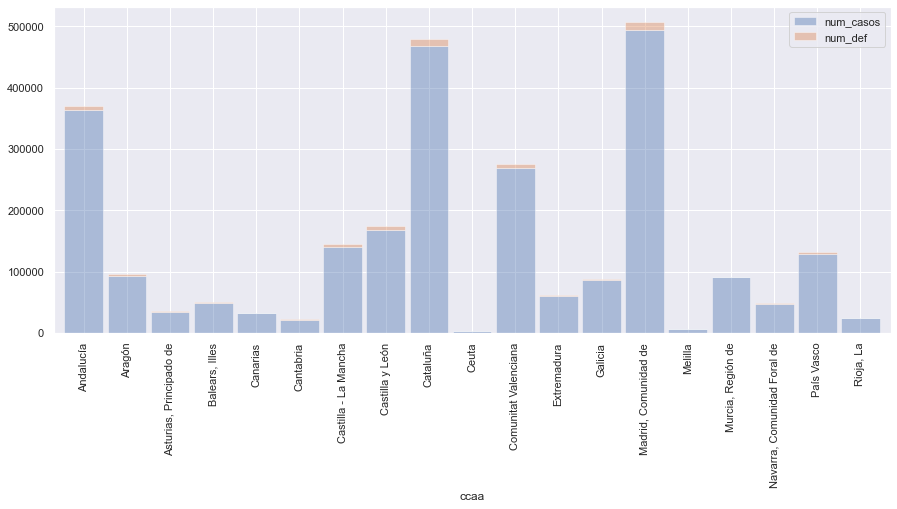

In [26]:
df_1.plot(kind = 'bar', stacked = 'True',   alpha = 0.4,  width = 0.9,  figsize=(15,6)); 

### Diferencias entre librerías

**Matplotlib.pyplot** es una biblioteca de Python que se utiliza para crear gráficos y visualizaciones de datos. Ofrece una gran cantidad de opciones para personalizar y configurar gráficos, y es muy comúnmente utilizada en la ciencia de datos y el análisis de datos.

**Seaborn** es otra biblioteca de Python para crear gráficos y visualizaciones de datos. A menudo se utiliza para mejorar la apariencia de los gráficos creados con matplotlib, ya que proporciona una amplia variedad de estilos de gráficos y paletas de colores atractivas. Además, seaborn también ofrece funcionalidades adicionales para el análisis de datos, como la capacidad de crear gráficos de distribución y correlación.

**Pygal** es una biblioteca de Python para crear gráficos y visualizaciones de datos en forma de gráficos vectoriales (SVG). A diferencia de matplotlib y seaborn, que crean gráficos como imágenes raster, pygal genera gráficos en formato vectorial, lo que significa que se pueden escalar sin pérdida de calidad. Pygal es especialmente útil para crear gráficos interactivos y para la creación de gráficos para su uso en la web.

En resumen, matplotlib.pyplot y seaborn son bibliotecas ampliamente utilizadas para crear gráficos y visualizaciones de datos, mientras que pygal se utiliza principalmente para la creación de gráficos vectoriales interactivos para su uso en la web. Cada una de estas bibliotecas tiene sus propias fortalezas y usos específicos, y a menudo se utilizan de manera complementaria en proyectos de análisis de datos.